In [ ]:
#this is the way we download data directly to colab
#in zip format we got the data

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 24.9MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.2MB/s]


In [ ]:
#for unzipping

import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#we will be using concept of generator as ram is limited but amount of images is large
#so batch is created and for a time that batch will be precessed and then other come so previous one removed

#we create two object one for training and other for cross validation
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train', #this is path of dataset
    labels='inferred',
    label_mode = 'int', #it will assign 0 and 1 to cat and dog
    batch_size=32,
    image_size=(256,256) #our images can be different so this will convert image to 256x256x3
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

#these images are stored in numpy array
#and the contain values 0-255 so we need to normalize

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32) #we are converting to tensors
    return image,label

train_ds = train_ds.map(process) #we use map function that apply process function to all image and label one by one
#and returning normalize image and its label
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 66s 85ms/step - loss: 0.6490 - accuracy: 0.6201 - val_loss: 0.5728 - val_accuracy: 0.7096
Epoch 2/10
625/625 [==============================] - 53s 84ms/step - loss: 0.5193 - accuracy: 0.7415 - val_loss: 0.4952 - val_accuracy: 0.7632
Epoch 3/10
625/625 [==============================] - 52s 83ms/step - loss: 0.3945 - accuracy: 0.8183 - val_loss: 0.5086 - val_accuracy: 0.8002
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2571 - accuracy: 0.8894 - val_loss: 0.6487 - val_accuracy: 0.7908
Epoch 5/10
625/625 [==============================] - 57s 91ms/step - loss: 0.1428 - accuracy: 0.9441 - val_loss: 0.8272 - val_accuracy: 0.7928
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0916 - accuracy: 0.9667 - val_loss: 1.0800 - val_accuracy: 0.7708
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0621 - accuracy: 0.9801 - val_loss: 1.2147 - val_accuracy

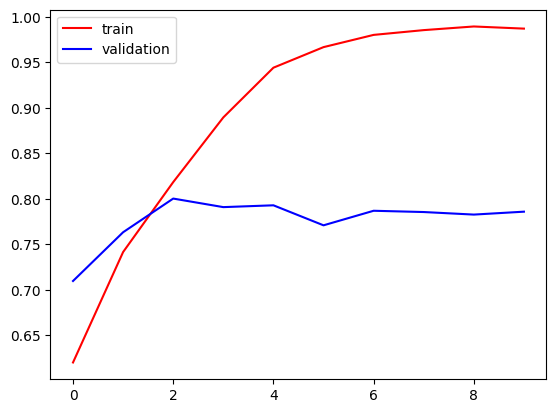

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

#there is large gap between training accuracy and validatn acc. that means model
#is overfiitting

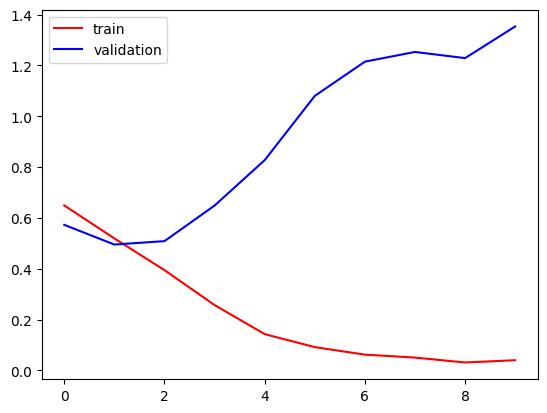

In [ ]:
#for loss

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
#we will be doing batch norm and drop out

In [ ]:
from keras.layers import BatchNormalization, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 106ms/step - loss: 1.5341 - accuracy: 0.5919 - val_loss: 0.6146 - val_accuracy: 0.6564
Epoch 2/10
625/625 [==============================] - 63s 101ms/step - loss: 0.4792 - accuracy: 0.7707 - val_loss: 0.5346 - val_accuracy: 0.7318
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4034 - accuracy: 0.8159 - val_loss: 0.4919 - val_accuracy: 0.7806
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3553 - accuracy: 0.8461 - val_loss: 0.5000 - val_accuracy: 0.7846
Epoch 6/10
625/625 [==============================] - 64s 101ms/step - loss: 0.2753 - accuracy: 0.8835 - val_loss: 0.5000 - val_accuracy: 0.7824
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1932 - accuracy: 0.9223 - val_loss: 0.5859 - val_accuracy: 0.7792
Epoch 8/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1362 - accuracy: 0.9484 - val_loss: 0.6959 - val_ac

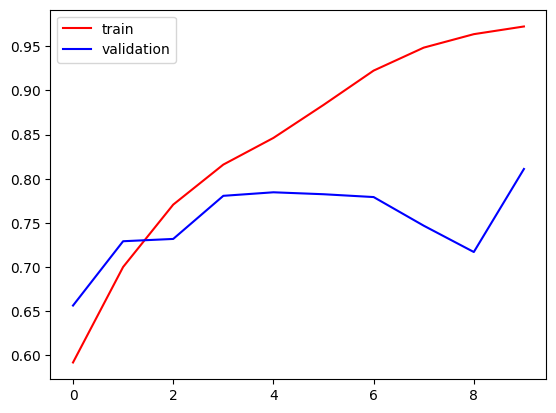

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

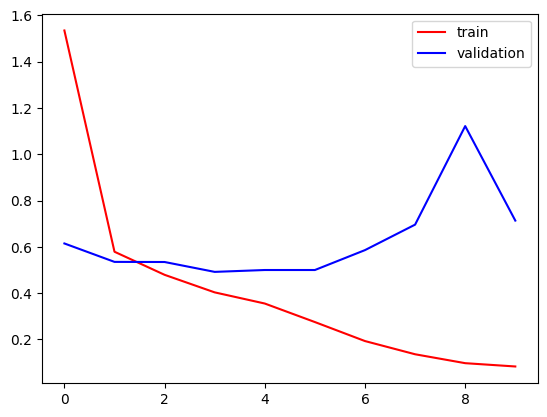

In [ ]:
#for loss

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [2]:
#for predicting

import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpg')
plt.imshow(test_img)


In [ ]:
test_img.shape

In [ ]:
test_img = cv2.resize(test_img,(256,256)) #reshape the image according to model


In [ ]:
test_input = test_img.reshape((1,256,256,3)) #we train by batches so need to rehsape image to 4d where 1 signify batch

In [ ]:
model.predict(test_input)